In [15]:
#KESSHI, LAILA, ASYURA

In [16]:
#Importing libraries
import cv2
import matplotlib.pyplot as plt

In [17]:
#Image paths
image_paths = [
    "00014.jpg",
    "brain tumour2.jpg",
    "pothole.jpg"
]

In [18]:
# Function for edge detection
def edge_detection(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error loading {img_path}")
        return None, None, None

    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)
    canny = cv2.Canny(img, 100, 200)

    return laplacian, sobel_combined, canny

In [19]:
# Store image results
results = {}
for path in image_paths:
    lap, sob, can = edge_detection(path)
    if lap is not None:
        results[path] = (lap, sob, can)

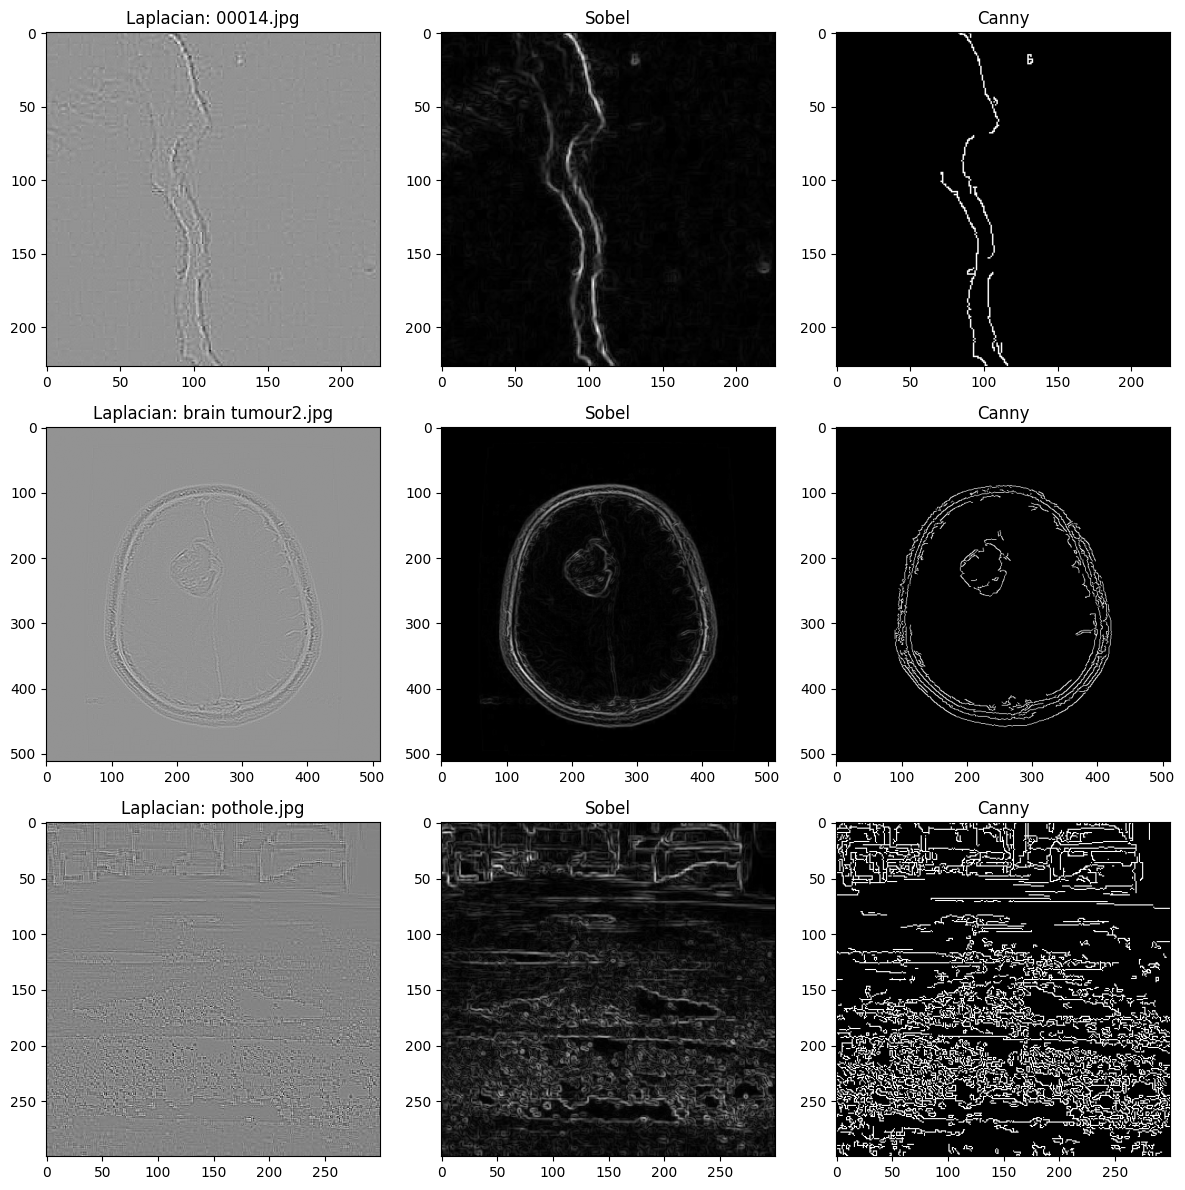

In [20]:
# Display all results in a grid
fig, axes = plt.subplots(len(results), 3, figsize=(12, 4*len(results)))

for i, (path, (lap, sob, can)) in enumerate(results.items()):
    axes[i, 0].imshow(lap, cmap='gray')
    axes[i, 0].set_title(f"Laplacian: {path}")

    axes[i, 1].imshow(sob, cmap='gray')
    axes[i, 1].set_title("Sobel")

    axes[i, 2].imshow(can, cmap='gray')
    axes[i, 2].set_title("Canny")

plt.tight_layout()
plt.show()